In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings('ignore')

#### Lectura dataframe

In [97]:
df = pd.read_parquet("./data/processed/data_eventos_fraude.parquet", engine='pyarrow')

#### Convertir el campo 'Ticket creado - Fecha' en formato 'yyyy-mm-dd'

In [98]:
df['Ticket creado - Fecha'] = df['Ticket creado - Fecha'].astype('datetime64[us]')
df['Ticket creado - Fecha'] = df['Ticket creado - Fecha'].dt.date

In [99]:
df['Ticket creado - Fecha'] = pd.to_datetime(df['Ticket creado - Fecha'])
result = df.groupby([df['Ticket creado - Fecha'].dt.to_period('M'), 'Modalidad']).agg({'ID del ticket': 'sum'}).reset_index()
result

,Ticket creado - Fecha,Modalidad,ID del ticket
0,2024-11,compras_no_reconocidas_con_tarjeta_débito_moda...,2037
1,2024-11,estafa_modalidad,60
2,2024-11,listas_restrictivas_bloqueos,5
3,2024-11,monitoreo_transaccional_bloqueos_alertas,134
4,2024-11,receptores_de_fraude_modalidad,708
5,2024-11,suplantación_de_identidad_modalidad,1185
6,2024-11,vulneración_de_cuentas_modalidad,12462
7,2024-12,compras_no_reconocidas_con_tarjeta_débito_moda...,2309
8,2024-12,estafa_modalidad,37
9,2024-12,listas_restrictivas_bloqueos,4


In [100]:
nulos = df['ID del ticket'].isnull().sum()

print(f'Cantidad de datos nulos en la columna "ID del ticket": {nulos}')


Cantidad de datos nulos en la columna "ID del ticket": 0


In [101]:
# Convertir la columna de fechas a tipo datetime
df['Ticket creado - Fecha'] = pd.to_datetime(df['Ticket creado - Fecha'])

# Agrupar por mes y modalidad, sumar los IDs de los tickets y contar la cantidad de tickets
result = df.groupby([df['Ticket creado - Fecha'].dt.to_period('M'), 'Modalidad']).agg({
    'ID del ticket': 'sum',
    'ID del ticket': 'count'
}).reset_index()

# Renombrar la columna 'ID del ticket' a 'Cantidad de tickets'
result = result.rename(columns={'ID del ticket': 'Cantidad de tickets'})

print(result)

result.to_excel("nada.xlsx")


   Ticket creado - Fecha                                          Modalidad  \
0                2024-11  compras_no_reconocidas_con_tarjeta_débito_moda...   
1                2024-11                                   estafa_modalidad   
2                2024-11                       listas_restrictivas_bloqueos   
3                2024-11           monitoreo_transaccional_bloqueos_alertas   
4                2024-11                     receptores_de_fraude_modalidad   
5                2024-11                suplantación_de_identidad_modalidad   
6                2024-11                   vulneración_de_cuentas_modalidad   
7                2024-12  compras_no_reconocidas_con_tarjeta_débito_moda...   
8                2024-12                                   estafa_modalidad   
9                2024-12                       listas_restrictivas_bloqueos   
10               2024-12           monitoreo_transaccional_bloqueos_alertas   
11               2024-12                     recepto

# Analisis general

## Cantidad de tickets All

percentil 80: 732.8 -> 20.51%
percentil 85: 749.0 -> 16.67%
percentil 90: 761.9 -> 10.26%
percentil 95: 865.95 -> 5.13%


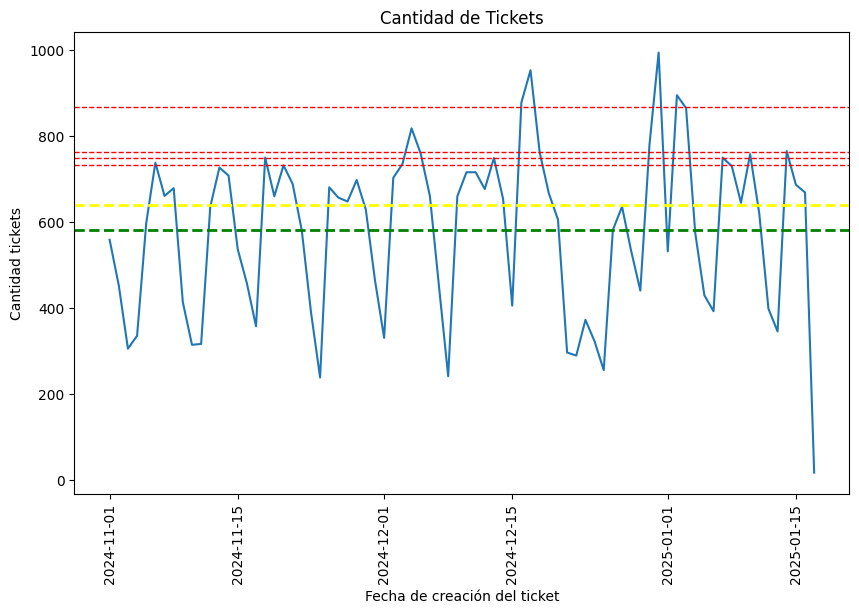

In [102]:
# TODOS LOS TICKETS
df_base_icg = df.copy()
df_base_icg = df_base_icg.groupby(['Ticket creado - Fecha']).agg({'ID del ticket': 'count'}).sort_values('ID del ticket')

list_percentil_icg = []

plt.figure(figsize=(10,6))
plt.title("Cantidad de Tickets")

plt.plot(df_base_icg.sort_index())
for i in np.arange(0.8,0.98,0.05):
    piv = round(np.nanpercentile(df_base_icg['ID del ticket'], i*100), 2)
    plt.axhline(y=piv, color='red', linewidth = 1, linestyle='--')
    print(f"percentil {int(i*100)}: {piv} -> {round(df_base_icg[df_base_icg['ID del ticket']>=piv].shape[0]/df_base_icg.shape[0]*100, 2)}%")
    #print(df_base_icg[df_base_icg['ID del ticket']>=round(np.nanpercentile(df_base_icg['ID del ticket'], i*100), 2)].shape[0])
    list_percentil_icg.append(piv)
plt.axhline(y=df_base_icg['ID del ticket'].mean(), color='green', linewidth = 2, linestyle='--')
plt.axhline(y=df_base_icg['ID del ticket'].median(), color='yellow', linewidth = 2, linestyle='--')
plt.xlabel("Fecha de creación del ticket")
plt.ylabel("Cantidad tickets")
plt.xticks(fontsize=10, rotation=90)
plt.show()


## Resultado Cantidad

In [103]:
df_base_icg.loc[:,['ID del ticket']].sort_index(ascending=False).head(10)

,ID del ticket
Ticket creado - Fecha,
2025-01-17,17
2025-01-16,668
2025-01-15,686
2025-01-14,764
2025-01-13,345
2025-01-12,398
2025-01-11,619
2025-01-10,757
2025-01-09,644


## Cantidad Tickets por Modalidad

percentil 80: 569.6 -> 20.51%
percentil 85: 576.05 -> 15.38%
percentil 90: 608.6 -> 10.26%
percentil 95: 695.2 -> 5.13%


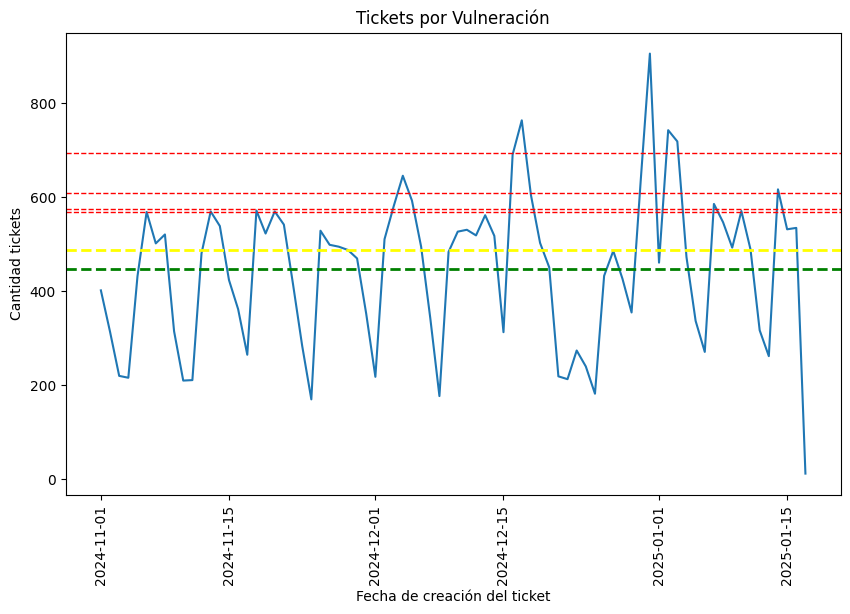

percentil 80: 49.0 -> 24.68%
percentil 85: 51.6 -> 15.58%
percentil 90: 54.2 -> 10.39%
percentil 95: 57.2 -> 5.19%


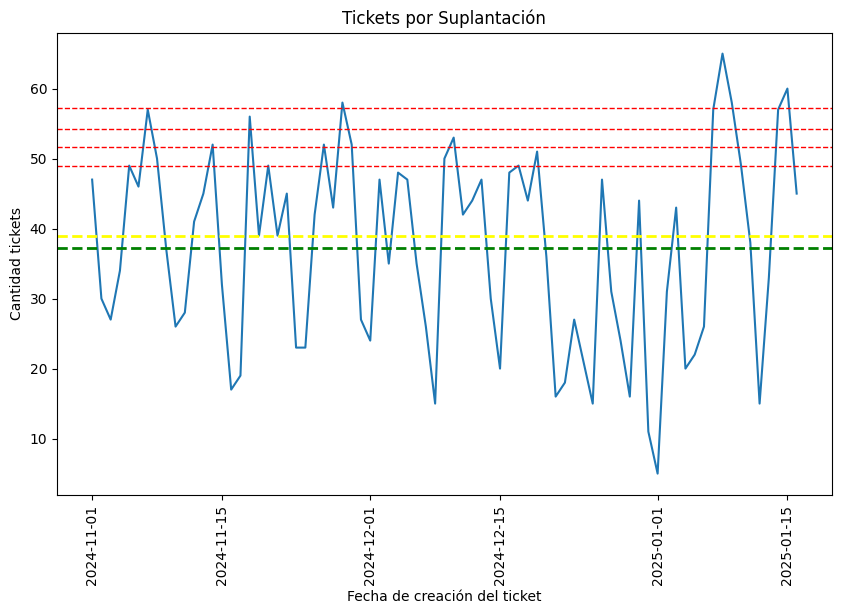

percentil 80: 3.0 -> 29.82%
percentil 85: 4.0 -> 17.54%
percentil 90: 4.0 -> 17.54%
percentil 95: 6.2 -> 5.26%


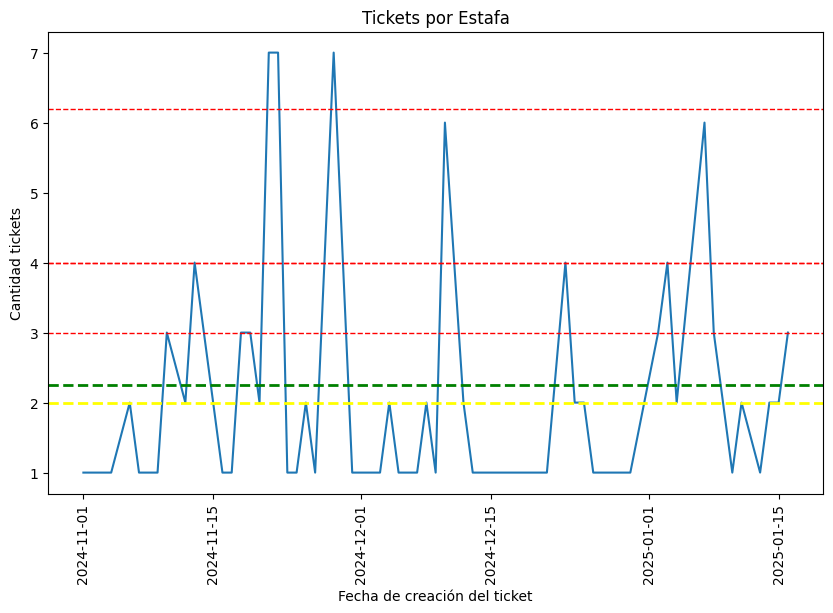

percentil 80: 84.0 -> 23.08%
percentil 85: 86.45 -> 15.38%
percentil 90: 93.9 -> 10.26%
percentil 95: 104.2 -> 5.13%


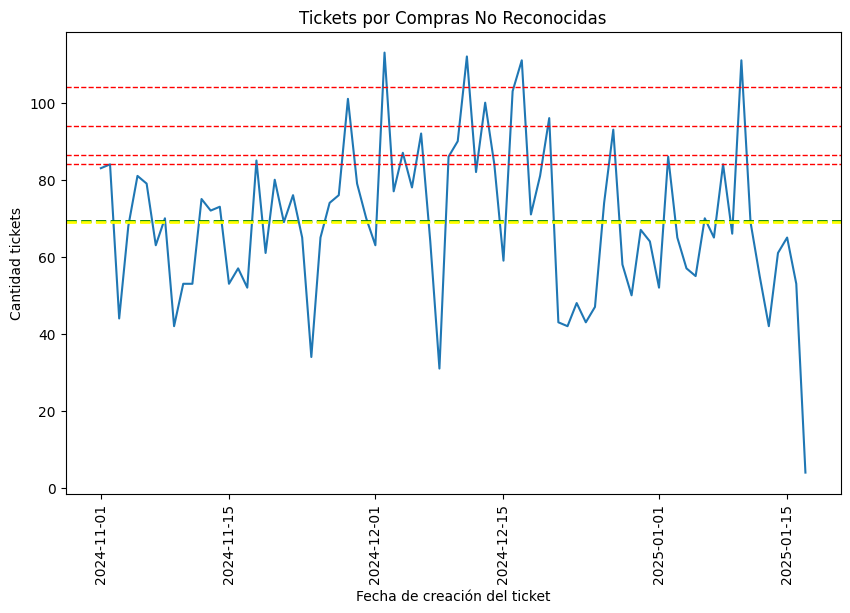

In [104]:
# TODOS LOS TICKETS VULNERACIÓN
df_base_icg = df.copy()
df_base_icg = df_base_icg.query(f"Modalidad=='vulneración_de_cuentas_modalidad'").copy()
df_base_icg = df_base_icg.groupby(['Ticket creado - Fecha']).agg({'ID del ticket': 'count'}).sort_values('ID del ticket')

list_percentil_icg = []

plt.figure(figsize=(10,6))
plt.title('Tickets por Vulneración')

plt.plot(df_base_icg.sort_index())
for i in np.arange(0.8,0.98,0.05):
    piv = round(np.nanpercentile(df_base_icg['ID del ticket'], i*100), 2)
    plt.axhline(y=piv, color='red', linewidth = 1, linestyle='--')
    print(f"percentil {int(i*100)}: {piv} -> {round(df_base_icg[df_base_icg['ID del ticket']>=piv].shape[0]/df_base_icg.shape[0]*100, 2)}%")
    #print(df_base_icg[df_base_icg['ID del ticket']>=round(np.nanpercentile(df_base_icg['ID del ticket'], i*100), 2)].shape[0])
    list_percentil_icg.append(piv)
plt.axhline(y=df_base_icg['ID del ticket'].mean(), color='green', linewidth = 2, linestyle='--')
plt.axhline(y=df_base_icg['ID del ticket'].median(), color='yellow', linewidth = 2, linestyle='--')
plt.xlabel("Fecha de creación del ticket")
plt.ylabel("Cantidad tickets")
plt.xticks(fontsize=10, rotation=90)
plt.show()

# TODOS LOS TICKETS SUPLANTACIÓN
df_base_icg = df.copy()
df_base_icg = df_base_icg.query(f"Modalidad=='suplantación_de_identidad_modalidad'").copy()
df_base_icg = df_base_icg.groupby(['Ticket creado - Fecha']).agg({'ID del ticket': 'count'}).sort_values('ID del ticket')

list_percentil_icg = []

plt.figure(figsize=(10,6))
plt.title('Tickets por Suplantación')

plt.plot(df_base_icg.sort_index())
for i in np.arange(0.8,0.98,0.05):
    piv = round(np.nanpercentile(df_base_icg['ID del ticket'], i*100), 2)
    plt.axhline(y=piv, color='red', linewidth = 1, linestyle='--')
    print(f"percentil {int(i*100)}: {piv} -> {round(df_base_icg[df_base_icg['ID del ticket']>=piv].shape[0]/df_base_icg.shape[0]*100, 2)}%")
    #print(df_base_icg[df_base_icg['ID del ticket']>=round(np.nanpercentile(df_base_icg['ID del ticket'], i*100), 2)].shape[0])
    list_percentil_icg.append(piv)
plt.axhline(y=df_base_icg['ID del ticket'].mean(), color='green', linewidth = 2, linestyle='--')
plt.axhline(y=df_base_icg['ID del ticket'].median(), color='yellow', linewidth = 2, linestyle='--')
plt.xlabel("Fecha de creación del ticket")
plt.ylabel("Cantidad tickets")
plt.xticks(fontsize=10, rotation=90)
plt.show()

# TODOS LOS TICKETS ESTAFA
df_base_icg = df.copy()
df_base_icg = df_base_icg.query(f"Modalidad=='estafa_modalidad'").copy()
df_base_icg = df_base_icg.groupby(['Ticket creado - Fecha']).agg({'ID del ticket': 'count'}).sort_values('ID del ticket')

list_percentil_icg = []

plt.figure(figsize=(10,6))
plt.title('Tickets por Estafa')

plt.plot(df_base_icg.sort_index())
for i in np.arange(0.8,0.98,0.05):
    piv = round(np.nanpercentile(df_base_icg['ID del ticket'], i*100), 2)
    plt.axhline(y=piv, color='red', linewidth = 1, linestyle='--')
    print(f"percentil {int(i*100)}: {piv} -> {round(df_base_icg[df_base_icg['ID del ticket']>=piv].shape[0]/df_base_icg.shape[0]*100, 2)}%")
    #print(df_base_icg[df_base_icg['ID del ticket']>=round(np.nanpercentile(df_base_icg['ID del ticket'], i*100), 2)].shape[0])
    list_percentil_icg.append(piv)
plt.axhline(y=df_base_icg['ID del ticket'].mean(), color='green', linewidth = 2, linestyle='--')
plt.axhline(y=df_base_icg['ID del ticket'].median(), color='yellow', linewidth = 2, linestyle='--')
plt.xlabel("Fecha de creación del ticket")
plt.ylabel("Cantidad tickets")
plt.xticks(fontsize=10, rotation=90)
plt.show()

# TODOS LOS TICKETS COMPRAS NO RECONOCIDAS
df_base_icg = df.copy()
df_base_icg = df_base_icg.query(f"Modalidad=='compras_no_reconocidas_con_tarjeta_débito_modalidad'").copy()
df_base_icg = df_base_icg.groupby(['Ticket creado - Fecha']).agg({'ID del ticket': 'count'}).sort_values('ID del ticket')

list_percentil_icg = []

plt.figure(figsize=(10,6))
plt.title('Tickets por Compras No Reconocidas')

plt.plot(df_base_icg.sort_index())
for i in np.arange(0.8,0.98,0.05):
    piv = round(np.nanpercentile(df_base_icg['ID del ticket'], i*100), 2)
    plt.axhline(y=piv, color='red', linewidth = 1, linestyle='--')
    print(f"percentil {int(i*100)}: {piv} -> {round(df_base_icg[df_base_icg['ID del ticket']>=piv].shape[0]/df_base_icg.shape[0]*100, 2)}%")
    #print(df_base_icg[df_base_icg['ID del ticket']>=round(np.nanpercentile(df_base_icg['ID del ticket'], i*100), 2)].shape[0])
    list_percentil_icg.append(piv)
plt.axhline(y=df_base_icg['ID del ticket'].mean(), color='green', linewidth = 2, linestyle='--')
plt.axhline(y=df_base_icg['ID del ticket'].median(), color='yellow', linewidth = 2, linestyle='--')
plt.xlabel("Fecha de creación del ticket")
plt.ylabel("Cantidad tickets")
plt.xticks(fontsize=10, rotation=90)
plt.show()

## Valor Reclamado

percentil 80: 219783362.2 -> 20.51%
percentil 85: 237340876.3 -> 15.38%
percentil 90: 245926836.1 -> 10.26%
percentil 95: 272676218.65 -> 5.13%


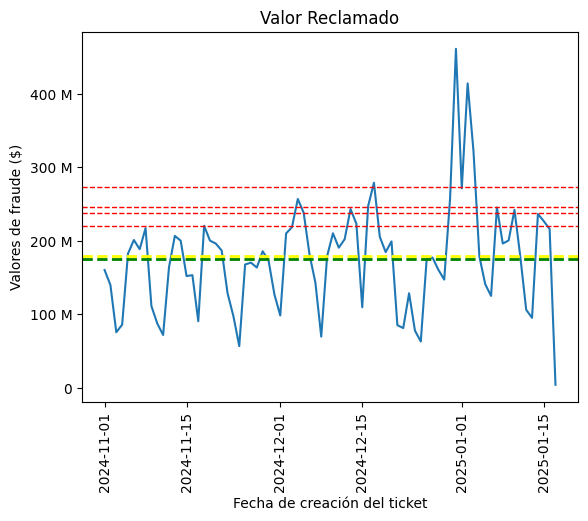

In [105]:
# TODOS LOS TICKETS
list_percentil_ie = []

df_base_ie = df.copy()
#df_base_ie = df_base_ie[df_base_ie['Tipo de incidente']=='Reclamo'].sort_values("Ticket creado - Fecha")
df_base_ie = df_base_ie.groupby(['Ticket creado - Fecha']).agg({'Valor del fraude': 'sum'}).sort_values('Valor del fraude')
fig, ax = plt.subplots()

# fig.figurefigsize=(10,6)

ax.ticklabel_format(style='plain')
plt.title('Valor Reclamado')
ax.yaxis.set_major_formatter(ticker.EngFormatter())

plt.plot(df_base_ie.sort_index())


for i in np.arange(0.8,0.98,0.05):
    piv = round(np.nanpercentile(df_base_ie['Valor del fraude'].replace({0:np.nan}).dropna(), i*100), 2)
    plt.axhline(y=piv, color='red', linewidth = 1, linestyle='--')
    print(f"percentil {int(i*100)}: {piv} -> {round(df_base_ie[df_base_ie['Valor del fraude']>=piv].shape[0]/df_base_icg.shape[0]*100, 2)}%")
    list_percentil_ie.append(piv)

    # print(df_base_ie[df_base_ie['Valor del fraude']>=piv].shape[0]/df_base_ie.shape[0])
    # print(df_base_ie[df_base_ie['Valor del fraude']>=piv].shape[0])
plt.axhline(y=df_base_ie['Valor del fraude'].mean(), color='green', linewidth = 2, linestyle='--')
plt.axhline(y=df_base_ie['Valor del fraude'].median(), color='yellow', linewidth = 2, linestyle='--')
plt.xticks(fontsize=10, rotation = 90)

plt.xlabel("Fecha de creación del ticket")
plt.ylabel("Valores de fraude ($)")
plt.show()


## Resultado Valor

In [106]:
df_base_ie['Valor del fraude'].sort_index(ascending=False).head(10)

Ticket creado - Fecha
2025-01-17      4231869.0
2025-01-16    216062868.0
2025-01-15    226855358.0
2025-01-14    236560507.0
2025-01-13     95306209.0
2025-01-12    106283868.0
2025-01-11    178178658.0
2025-01-10    242161646.0
2025-01-09    200610076.0
2025-01-08    196412148.0
Name: Valor del fraude, dtype: Float64

## Creación matriz

#### Valores exactos

In [107]:
resultado = pd.merge(df_base_ie, df_base_icg, left_index=True, right_index=True, how='outer')
# resultado['ID del ticket'] = resultado['ID del ticket'].replace({0, np.nan})

In [108]:
resultado = pd.merge(df_base_ie, df_base_icg, left_index=True, right_index=True, how='outer')
# resultado['ID del ticket'] = resultado['ID del ticket'].replace({0, np.nan})
list_perc = [round(i, 2) for i in list(np.arange(0.0,0.81,0.1)) + list(np.arange(0.85,1.01,0.05))]
list_perc_100 = [int(i*100) for i in list_perc]
resumen = resultado.describe(percentiles=list_perc)
resultado = resultado.fillna(0)

vals = [resumen['Valor del fraude'][f"{int(i)}%"] for i in list_perc_100]
vals[-1] = vals[-1]+1
vals[0] = 0

conteo = [resumen['ID del ticket'][f"{i}%"] for i in list_perc_100]
conteo[-1] = conteo[-1]+1
conteo[0] = 0

matriz = pd.DataFrame(columns=conteo[1:])
acum = 0
for i in range(len(vals)-1):
    piv = []
    #print(f"Valor del fraude entre {vals[i]} y {vals[i+1]}")
    for j in range(len(conteo)-1):
        #print(f"Cantidad de tickets entre {conteo[j]} y {conteo[j+1]}")
        res = (resultado[(resultado['Valor del fraude']>=vals[i]) & (resultado['Valor del fraude']<vals[i+1])    &      (resultado['ID del ticket']>=conteo[j])&(resultado['ID del ticket']<conteo[j+1])].shape[0]) / resultado.shape[0] * 100
        #print(res)
        piv.append(res)
        acum = acum+res
    #print(piv)
    #("")
    df_piv = pd.DataFrame([piv], columns=conteo[1:])
    matriz = pd.concat([matriz, df_piv])

matriz = matriz.set_index(keys=[vals[1:]])


In [109]:
list_perc_100.remove(0)
list_perc_100 = [str(i) for i in list_perc_100]

matriz = pd.concat([matriz, pd.DataFrame([[str(i) for i in list_perc_100]], columns=matriz.columns)], axis=0)
matriz["Percentiles"] = list_perc_100 + [""]
matriz.columns = [int(i) if isinstance(i, float) else i for i in matriz.columns]

#matriz.to_excel("../data/refined/01. matriz GF general detallada.xlsx")
matriz

,43,53,59,65,69,74,79,84,86,93,104,114,Percentiles
8.417599e+07,6.410256,2.564103,1.282051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
1.076443e+08,2.564103,1.282051,2.564103,1.282051,2.564103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20
1.414404e+08,1.282051,1.282051,2.564103,0.0,0.0,2.564103,1.282051,0.0,1.282051,0.0,0.0,0.0,30
1.639478e+08,0.0,1.282051,3.846154,1.282051,0.0,0.0,1.282051,1.282051,0.0,0.0,0.0,0.0,40
1.790610e+08,0.0,0.0,1.282051,0.0,1.282051,1.282051,3.846154,1.282051,0.0,1.282051,0.0,0.0,50
1.918536e+08,0.0,0.0,0.0,1.282051,0.0,1.282051,0.0,2.564103,1.282051,1.282051,1.282051,1.282051,60
2.022294e+08,0.0,0.0,0.0,1.282051,1.282051,1.282051,0.0,2.564103,1.282051,0.0,1.282051,0.0,70
2.197834e+08,0.0,0.0,1.282051,0.0,0.0,3.846154,1.282051,1.282051,0.0,1.282051,0.0,1.282051,80
2.373409e+08,0.0,0.0,0.0,1.282051,1.282051,0.0,0.0,0.0,2.564103,0.0,0.0,0.0,85
2.459268e+08,0.0,0.0,0.0,0.0,1.282051,0.0,1.282051,0.0,0.0,0.0,1.282051,1.282051,90


#### Funcines para redondear valores y definir intervalos automáticamente

In [110]:
# Función para redondear a miles los valores menores a 5 millones
def redondear_a_miles(valor):
    return int(round(valor / 100000) * 100000)

def redondear_valores_altos(value):
    # Redondeando valores de millones
    if value < 5000000:
        return redondear_a_miles(round(value))  # Si el valor es menor que 5 millones, redondearlo solamente
    remainder = value % 5000000  # Obtener el residuo al dividir por 5,000,000
    if remainder < 2500000:
        rounded_value = value - remainder  # Redondear hacia abajo
    else:
        rounded_value = value + (5000000 - remainder)  # Redondear hacia arriba
    return int(rounded_value)

def redondear_valores_bajos(value):
    rounded_value = int(round(value / 5) * 5)
    return rounded_value

def lista_intervalos(lista):
    lista = [round(x) for x in lista]
    if len(lista) != len(set(lista)): #Verificando si hay repetidos en la lista
        # Obtener el valor mínimo y máximo de la lista
        minimo_valor = min(lista)
        maximo_valor = max(lista)
        # Calcular el intervalo entre los valores mínimo y máximo
        intervalo = (maximo_valor - minimo_valor) / (len(lista) - 1)
        intervalo= round(intervalo)
        # Rellenar la lista con valores intermedios
        nueva_lista = [minimo_valor + i * intervalo for i in range(len(lista))]
        return nueva_lista
    else:
        return(lista)

#### Propuestas

In [111]:
results_icg = [redondear_valores_bajos(x) for x in list_percentil_icg]
results_ie = [redondear_valores_altos(x) for x in list_percentil_ie]

cantidad = [0, np.inf]
cantidad[1:1] = results_icg 

valores = [0, np.inf]
valores[1:1] = results_ie

print(cantidad)
print(valores)

matriz = pd.DataFrame(columns=cantidad[1:])
acum = 0

for i in range(len(cantidad)-1):
    piv = []
    for j in range(len(valores)-1):
        #print(f"Cantidad [{cantidad[i]} - {cantidad[i+1]})")
        #print(f"Valores [{valores[j]} - {valores[j+1]})")
        res = resultado[(resultado['Valor del fraude']>=valores[i])&(resultado['Valor del fraude']<valores[i+1])&
                        (resultado['ID del ticket']>=cantidad[j])&(resultado['ID del ticket']<cantidad[j+1])].shape[0]/resultado.shape[0]
        #print(res)
        piv.append(res)
        acum = acum+res
    #print(piv)
    df_piv = pd.DataFrame([piv], columns=cantidad[1:])
    matriz = pd.concat([matriz, df_piv])
matriz = matriz.set_index(keys=[valores[1:]])
matriz.to_excel("./data/refined/02. matriz GF general propuesta.xlsx")
matriz

[0, 85, 85, 95, 105, inf]
[0, 220000000, 235000000, 245000000, 275000000, inf]


,85.0,85.0,95.0,105.0,inf
220000000.0,0.692308,0.0,0.051282,0.025641,0.025641
235000000.0,0.025641,0.0,0.012821,0.000000,0.000000
245000000.0,0.025641,0.0,0.000000,0.012821,0.012821
275000000.0,0.038462,0.0,0.012821,0.012821,0.000000
inf,0.025641,0.0,0.012821,0.000000,0.012821


## Segmentado

In [112]:
def creacion_matriz(df_base_ie, df_base_icg, caso, flag, cantidad, valores, contador, contador2):
    resultado = pd.merge(df_base_ie, df_base_icg, left_index=True, right_index=True, how='outer')
    resultado['ID del ticket'] = resultado['ID del ticket'].replace({0: np.nan})
    list_perc = [round(i, 2) for i in list(np.arange(0.0,0.81,0.1)) + list(np.arange(0.85,1.01,0.05))]
    list_perc_100 = [int(i*100) for i in list_perc]
    resumen = resultado.describe(percentiles=list_perc)
    resultado = resultado.fillna(0)

    vals = [resumen['Valor del fraude'][f"{int(i)}%"] for i in list_perc_100]
    vals[-1] = vals[-1]+1
    vals[0] = 0

    conteo = [resumen['ID del ticket'][f"{i}%"] for i in list_perc_100]
    conteo[-1] = conteo[-1]+1
    conteo[0] = 0

    matriz = pd.DataFrame(columns=conteo[1:])
    acum = 0
    for i in range(len(vals)-1):
        piv = []
        for j in range(len(conteo)-1):
            res = (resultado[(resultado['Valor del fraude']>=vals[i]) & (resultado['Valor del fraude']<vals[i+1]) & \
                            (resultado['ID del ticket']>=conteo[j])&(resultado['ID del ticket']<conteo[j+1])].shape[0]) / resultado.shape[0] * 100
            piv.append(res)
            acum = acum+res
        df_piv = pd.DataFrame([piv], columns=conteo[1:])
        matriz = pd.concat([matriz, df_piv])

    matriz = matriz.set_index(keys=[vals[1:]])
    list_perc_100.remove(0)
    list_perc_100 = [str(i) for i in list_perc_100]

    matriz = pd.concat([matriz, pd.DataFrame([[str(i) for i in list_perc_100]], columns=matriz.columns)], axis=0)
    matriz["Percentiles"] = list_perc_100 + [""]
    matriz.columns = [int(i) if isinstance(i, float) else i for i in matriz.columns]

    if flag:
        matriz_prop = pd.DataFrame(columns=cantidad[1:])
        acum = 0

        for i in range(len(cantidad)-1):
            piv = []
            for j in range(len(valores)-1):
                res = resultado[(resultado['Valor del fraude']>=valores[i])&(resultado['Valor del fraude']<valores[i+1])& \
                                (resultado['ID del ticket']>=cantidad[j])&(resultado['ID del ticket']<cantidad[j+1])].shape[0]/resultado.shape[0]
                piv.append(res)
                acum = acum+res
            df_piv = pd.DataFrame([piv], columns=cantidad[1:])
            matriz_prop = pd.concat([matriz_prop, df_piv])
        matriz_prop = matriz_prop.set_index(keys=[valores[1:]])
    else:
        matriz_prop = pd.DataFrame()

    return matriz, matriz_prop

In [113]:
# df_base_suplantacion = df.query(f"Modalidad=='Suplantación de identidad'").copy()
df_base_suplantacion = df.query(f"Modalidad=='suplantación_de_identidad_modalidad'").copy()
df_base_ie_suplantacion = df_base_suplantacion.groupby(['Ticket creado - Fecha']).agg({'Valor del fraude': 'sum'}).sort_values('Valor del fraude')
df_base_icg_suplantacion = df_base_suplantacion.groupby(['Ticket creado - Fecha']).agg({'ID del ticket': 'count'}).sort_values('ID del ticket')

# df_base_vulneracion = df.query(f"Modalidad=='Vulneración de cuenta'").copy()
df_base_vulneracion = df.query(f"Modalidad=='vulneración_de_cuentas_modalidad'").copy()
df_base_ie_vulneracion = df_base_vulneracion.groupby(['Ticket creado - Fecha']).agg({'Valor del fraude': 'sum'}).sort_values('Valor del fraude')
df_base_icg_vulneracion = df_base_vulneracion.groupby(['Ticket creado - Fecha']).agg({'ID del ticket': 'count'}).sort_values('ID del ticket')

# df_base_estafa = df.query(f"Modalidad=='Estafa'").copy()
df_base_estafa = df.query(f"Modalidad=='estafa_modalidad'").copy()
df_base_ie_estafa = df_base_estafa.groupby(['Ticket creado - Fecha']).agg({'Valor del fraude': 'sum'}).sort_values('Valor del fraude')
df_base_icg_estafa = df_base_estafa.groupby(['Ticket creado - Fecha']).agg({'ID del ticket': 'count'}).sort_values('ID del ticket')

# df_base_tarjeta = df.query(f"Modalidad=='Compras no reconocidas con Tarjeta Débito Nequi Visa'").copy()
df_base_tarjeta = df.query(f"Modalidad=='compras_no_reconocidas_con_tarjeta_débito_modalidad'").copy()
df_base_ie_tarjeta = df_base_tarjeta.groupby(['Ticket creado - Fecha']).agg({'Valor del fraude': 'sum'}).sort_values('Valor del fraude')
df_base_icg_tarjeta = df_base_tarjeta.groupby(['Ticket creado - Fecha']).agg({'ID del ticket': 'count'}).sort_values('ID del ticket')


In [114]:
df["Modalidad"].unique()

<StringArray>
['compras_no_reconocidas_con_tarjeta_débito_modalidad',
                    'vulneración_de_cuentas_modalidad',
                                    'estafa_modalidad',
                 'suplantación_de_identidad_modalidad',
                      'receptores_de_fraude_modalidad',
            'monitoreo_transaccional_bloqueos_alertas',
                        'listas_restrictivas_bloqueos']
Length: 7, dtype: string

In [115]:
#definiendo la lista de dataframes que tienen todos los calores calulados de icg y ei.
Lista_bases_icg = [df_base_icg_suplantacion, df_base_icg_vulneracion, df_base_icg_estafa, df_base_icg_tarjeta]
Lista_bases_ie = [df_base_ie_suplantacion, df_base_ie_vulneracion, df_base_ie_estafa, df_base_ie_tarjeta]

#Convertir en una lista de listas todos los valores de los dataframes.
def convertir_en_listas(lista_df):
    list_return = []
    for df in lista_df:
        lista = (df.describe(percentiles=np.arange(0.8, 1, 0.05))).to_dict()
        df = pd.DataFrame(lista)
        try:
            list_result = df["ID del ticket"].apply(pd.Series).reset_index()
        except:
             list_result = df["Valor del fraude"].apply(pd.Series).reset_index()
        list_return.append(list(list_result[0].loc[1:4]))
    return list_return

all_bases_icg = convertir_en_listas(Lista_bases_icg)
print(all_bases_icg)
all_bases_ie = convertir_en_listas(Lista_bases_ie)
print(all_bases_ie)

for i in range(len(Lista_bases_icg)):
      for j in range(1,5,1):
        all_bases_icg = [lista_intervalos(x) for x in all_bases_icg]

for i in range(len(Lista_bases_ie)):
      all_bases_ie[i] = [redondear_valores_altos(x) for x in all_bases_ie[i]]

for i in range(len(all_bases_ie)):
      for j in range(len(Lista_bases_ie)):
        all_bases_ie = [lista_intervalos(x) for x in all_bases_ie]

# Como el redondeo a nivel de 5 millones puede trae repetidos, entonces se hace un segundo redondeo a nivel de miles para definir intervalos.
for i in range(len(all_bases_ie)):
    all_bases_ie[i] = [round(valor / 100000) * 100000 for valor in all_bases_ie[i]]

print()
print(all_bases_icg)
print(all_bases_ie)

[[37.27272727272727, 14.040014585796484, 5.0, 39.0], [446.53846153846155, 162.24197835473882, 12.0, 487.0], [2.245614035087719, 1.6720464552071892, 1.0, 2.0], [69.3076923076923, 20.090902310358178, 4.0, 69.0]]
[[295007.4025974026, 690148.6738689994, 0.0, 0.0], [162859633.73076922, 71939443.41391279, 3096294.0, 163482032.5], [605236.8070175438, 1042168.8028015087, 0.0, 100000.0], [11730109.217948718, 4646439.722442258, 1135575.0, 10894197.0]]

[[37, 14, 5, 39], [447, 162, 12, 487], [1, 1, 1, 1], [4, 26, 48, 70]]
[[0, 200000, 500000, 700000], [3100000, 57100000, 111000000, 165000000], [600000, 1000000, 0, 100000], [1100000, 4100000, 7000000, 10000000]]


In [116]:
# Suplantación
x = [0, np.inf]
y = [0, np.inf]
x[1:1] = all_bases_icg[0]
y[1:1] = all_bases_ie[0]
matriz_suplantacion, matriz_suplantacion_prop = creacion_matriz(df_base_ie_suplantacion, df_base_icg_suplantacion, "suplantacion", True, x, y, "03", "04")

# Vulneración
x = [0, np.inf]
y = [0, np.inf]
x[1:1] = all_bases_icg[1]
y[1:1] = all_bases_ie[1]
matriz_vulneracion, matriz_vulneracion_prop = creacion_matriz(df_base_ie_vulneracion, df_base_icg_vulneracion, "vulneracion", True, x, y, "05", "06")

# Tarjeta
x = [0, np.inf]
y = [0, np.inf]
x = all_bases_ie[2]
y = all_bases_ie[2]
matriz_tarjeta, matriz_tarjeta_prop = creacion_matriz(df_base_ie_tarjeta, df_base_icg_tarjeta, "tarjeta", True, x, y,  "13", "14")

# Estafa
x = [0, np.inf]
y = [0, np.inf]
x[1:1] = all_bases_icg[3]
y[1:1] = all_bases_ie[3]
matriz_estafa, matriz_estafa_prop = creacion_matriz(df_base_ie_estafa, df_base_icg_estafa, "estafa", True, x, y, "09", "10")

# Tickets con valores de fraude anómalos

Umbral -> $ 2150000.0
Cantidad de outliers -> 697 -> Un 1.74% del total


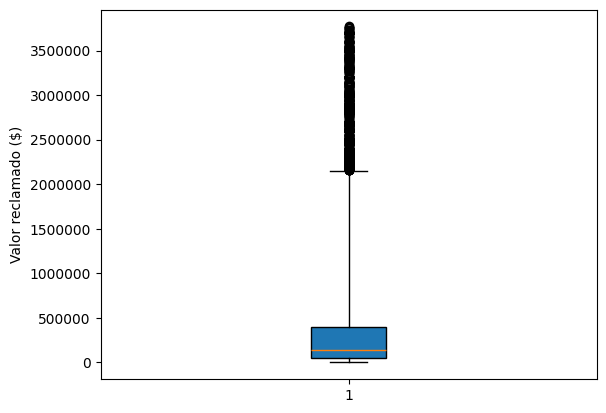

In [117]:
df_anomalos = df.copy()
df_anomalos['Valor del fraude'] = df_anomalos['Valor del fraude'].replace({0:np.nan})
data =  df_anomalos[df_anomalos['Valor del fraude']<20000000]['Valor del fraude'].dropna()

fig, ax = plt.subplots()
ax.ticklabel_format(style='plain')

boxplot = ax.boxplot(data, whis=5, patch_artist=True)


whisker_max = boxplot['whiskers'][1].get_ydata()[1]
cant_outliers = df_anomalos[df_anomalos['Valor del fraude']>=whisker_max].shape[0]
print(f"Umbral -> $ {whisker_max}")
print(f"Cantidad de outliers -> {cant_outliers} -> Un {round(cant_outliers/df_anomalos[df_anomalos['Valor del fraude']>=0].shape[0]*100, 2)}% del total")

plt.ylabel('Valor reclamado ($)')
plt.show()